<a href="https://colab.research.google.com/github/GiulioAppetito/AMOD_Project_2021_22/blob/master/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [24]:
def dataframes(url):
  df = pd.read_csv(url)
  df = df.sort_values(by = ['jobs'])

  dfClose = df[df['releaseTimes']=='releasesCloseToZero']
  dfFar = df[df['releaseTimes']=='releasesFarFromZero']
  dfLow = df[df['releaseTimes']=='releasesLowVariance']
  dfUniform = df[df['releaseTimes']=='releasesUniform']
  dfHigh = df[df['releaseTimes']=='releasesHighVariance']

  # releases - processing 
  dfCloseLow = dfClose[dfClose['processingTimes']=='processingLowVariance']
  dfCloseUniform = dfClose[dfClose['processingTimes']=='processingUniform']
  dfCloseHigh = dfClose[dfClose['processingTimes']=='processingHighVariance']

  dfFarLow = dfFar[dfFar['processingTimes']=='processingLowVariance']
  dfFarUniform = dfFar[dfFar['processingTimes']=='processingUniform']
  dfFarHigh = dfFar[dfFar['processingTimes']=='processingHighVariance']

  dfLowLow = dfLow[dfLow['processingTimes']=='processingLowVariance']
  dfLowUniform = dfLow[dfLow['processingTimes']=='processingUniform']
  dfLowHigh = dfLow[dfLow['processingTimes']=='processingHighVariance']

  dfUniformLow = dfUniform[dfUniform['processingTimes']=='processingLowVariance']
  dfUniformUniform = dfUniform[dfUniform['processingTimes']=='processingUniform']
  dfUniformHigh = dfUniform[dfUniform['processingTimes']=='processingHighVariance']

  dfHighLow = dfHigh[dfHigh['processingTimes']=='processingLowVariance']
  dfHighUniform = dfHigh[dfHigh['processingTimes']=='processingUniform']
  dfHighHigh = dfHigh[dfHigh['processingTimes']=='processingHighVariance']

  dfs = [dfCloseLow,dfCloseUniform,dfCloseHigh,dfFarLow,dfFarUniform,dfFarHigh,dfLowLow,dfLowUniform,dfLowHigh,dfUniformLow,dfUniformUniform,dfUniformHigh,dfHighLow,dfHighUniform,dfHighHigh]
  return dfs


In [41]:
dfs = dataframes('https://raw.githubusercontent.com/GiulioAppetito/AMOD_Project_2021_22/master/results_5.0_sec.csv')
labels = ['dfCloseLow','dfCloseUniform','dfCloseHigh','dfFarLow','dfFarUniform','dfFarHigh','dfLowLow','dfLowUniform','dfLowHigh','dfUniformLow','dfUniformUniform','dfUniformHigh','dfHighLow','dfHighUniform','dfHighHigh']

In [39]:
def graficoTempo(title, dframe,limit):
  intervals1 = []
  sample_means1 = []
  x = []
  y_gurobi = []
  y_bnb = []

  gurobiColor =  "#1a759f"
  bnbColor ="#fb8500"
  limitColor = "#f21b3f"

  df = dframe
  df = df.drop_duplicates(subset=['jobs'], keep='last')

  for i in df.index:
    x.append(df.loc[i,"jobs"])
    y_gurobi.append(df.loc[i,"gurobiTime"])
    y_bnb.append(df.loc[i,"bnbTime"])
  
  # plotting graph
  fig, ax = plt.subplots(1,figsize=(20,10))
  #fig.suptitle('Vertically stacked subplots')

  ax.plot(x, y_gurobi, label = "Gurobi", color = gurobiColor)
  ax.errorbar(x, y_gurobi, fmt ='o')
  ax.set_title(title)
  ax.set_xlabel('jobs')
  ax.set_ylabel('sec')
  ax.set_xlim(min(df['jobs']), max(df['jobs']))
  plt.xticks(range(min(df['jobs']), max(df['jobs']),5))


  ax.plot(x, y_bnb, label = "Branch & Bound",color = bnbColor)
  ax.errorbar(x, y_bnb, fmt ='o')
  ax.axhline(y = limit, label='Time limit',color = limitColor)

  plt.legend(loc="upper left")

  #ax.set_title('k = 64')

15


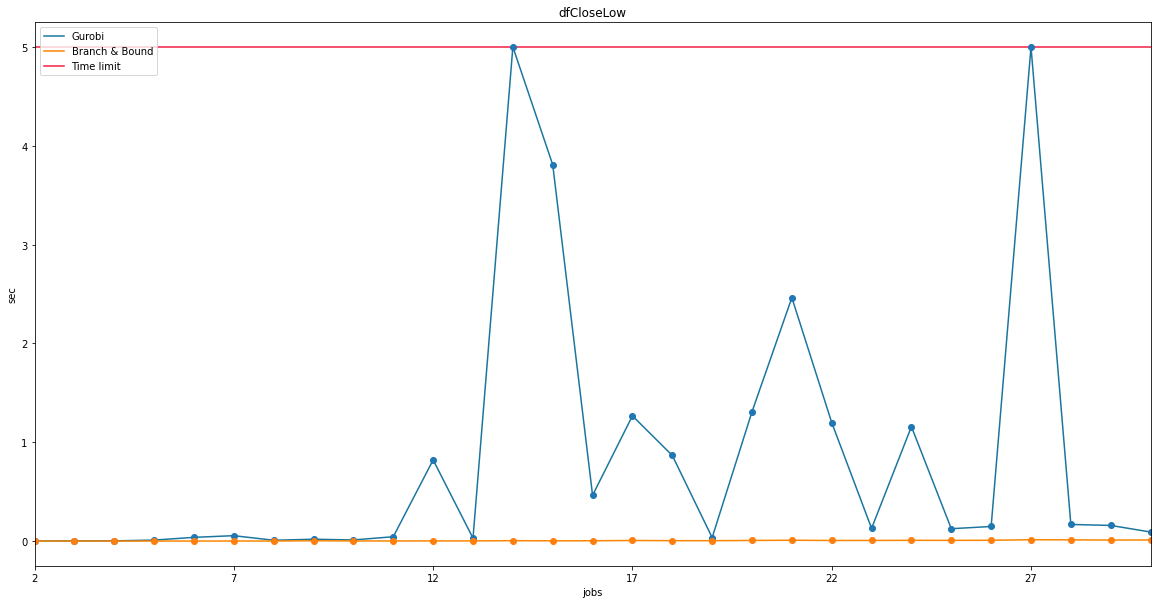

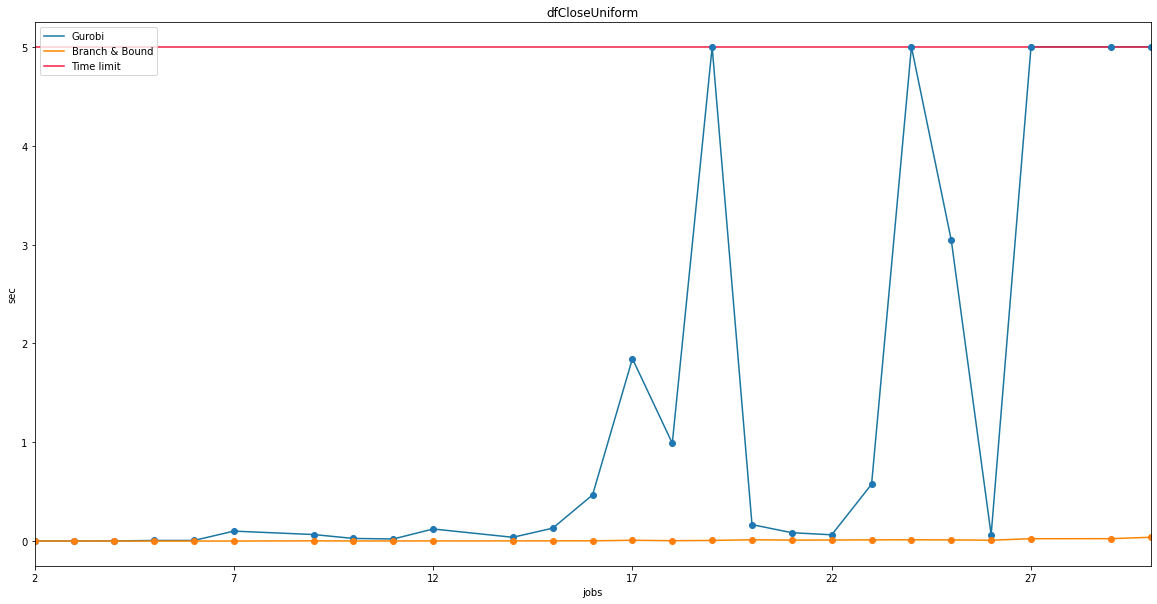

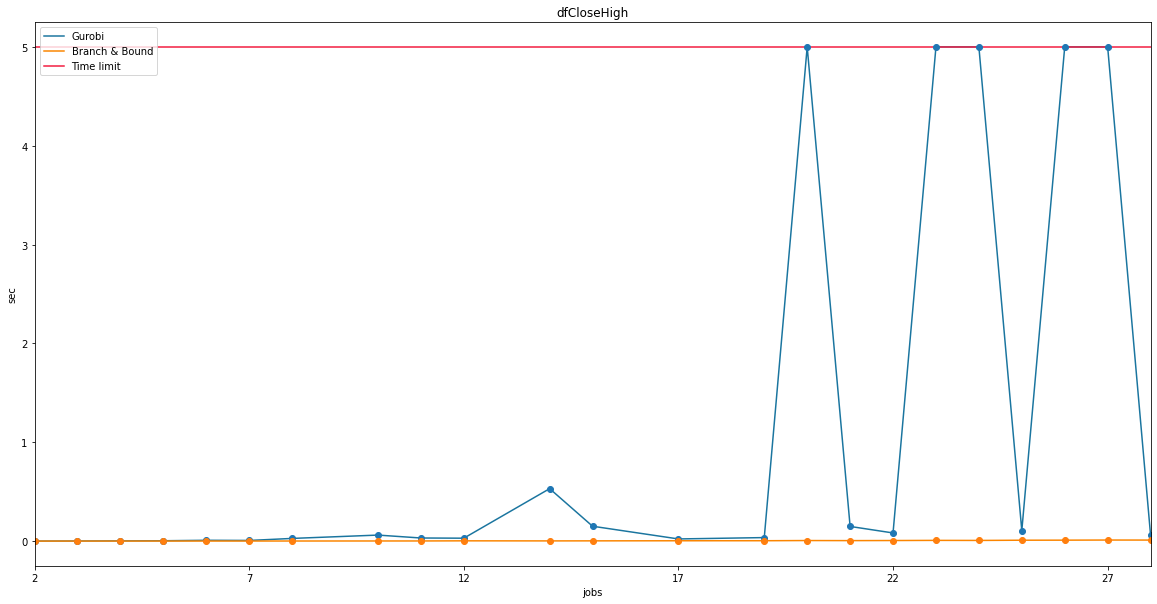

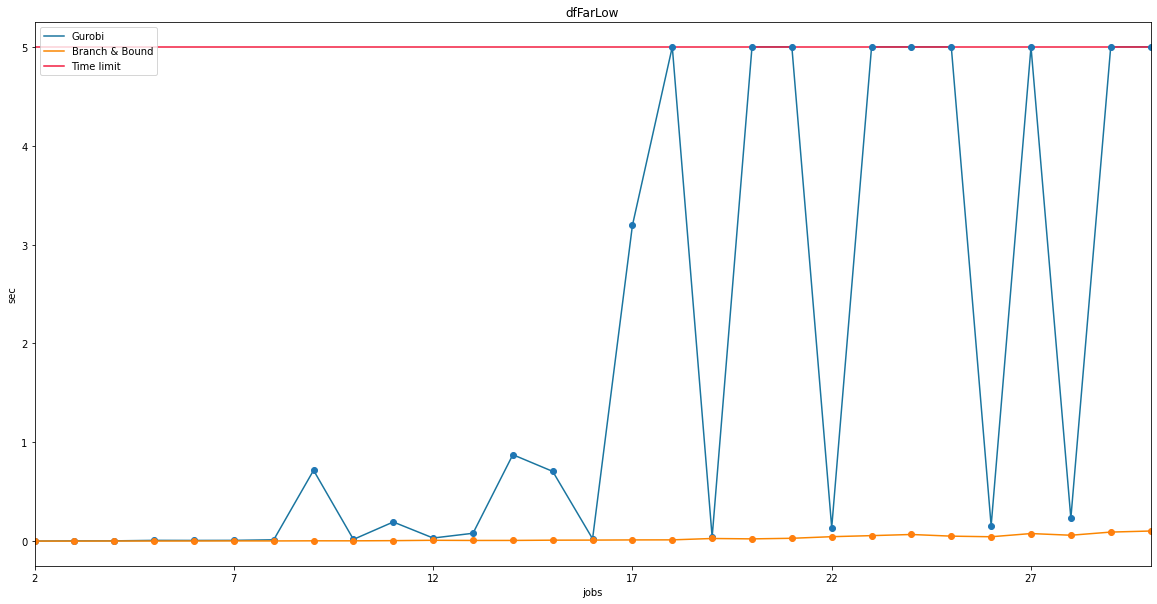

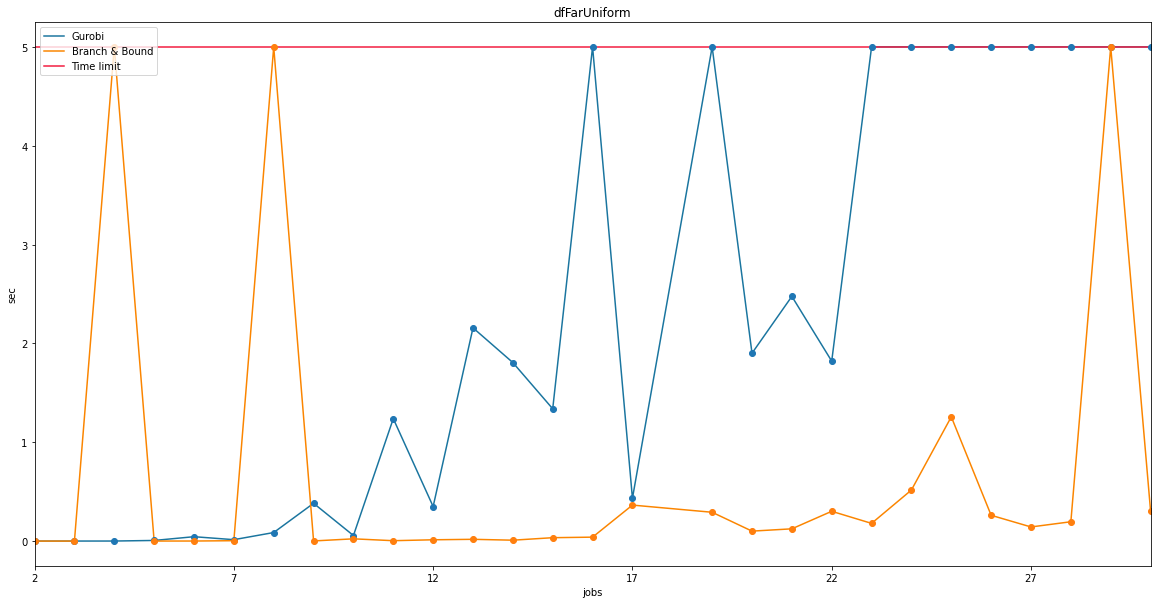

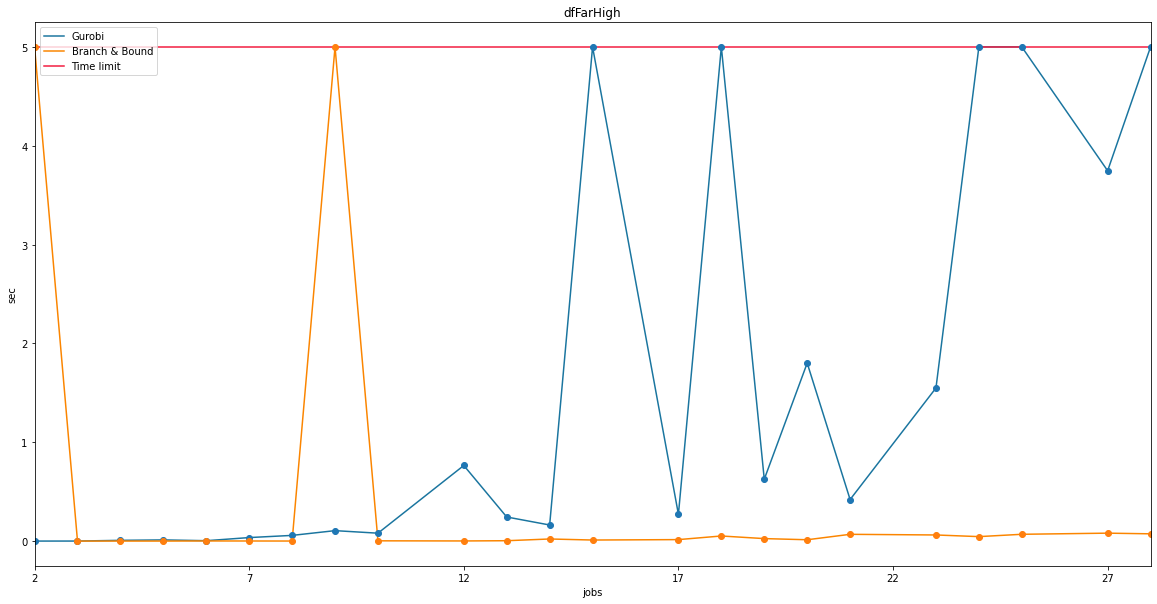

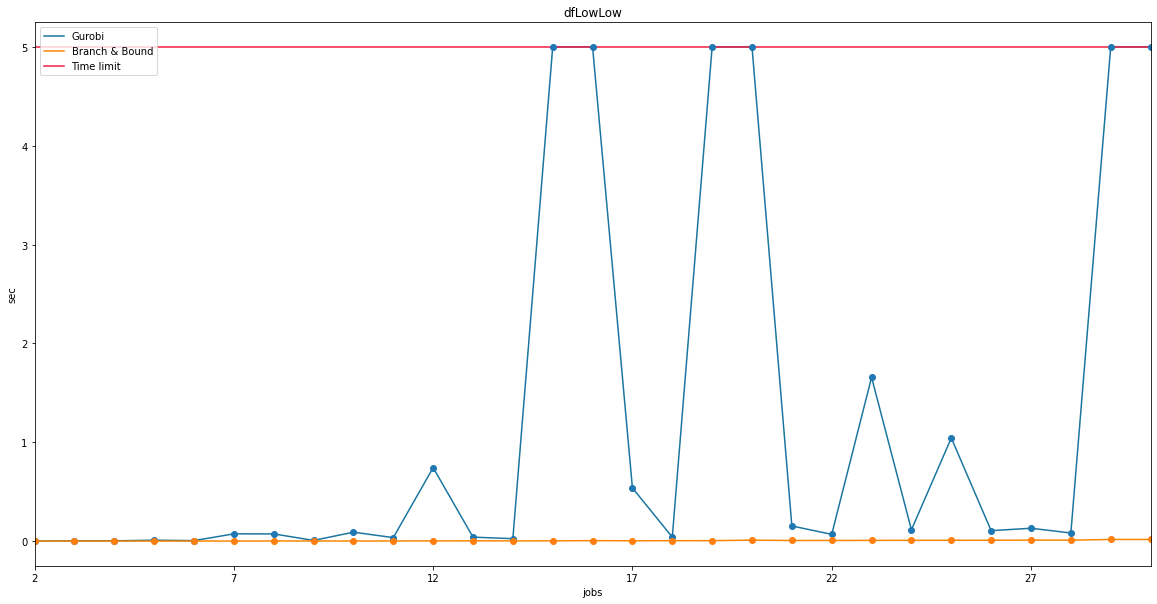

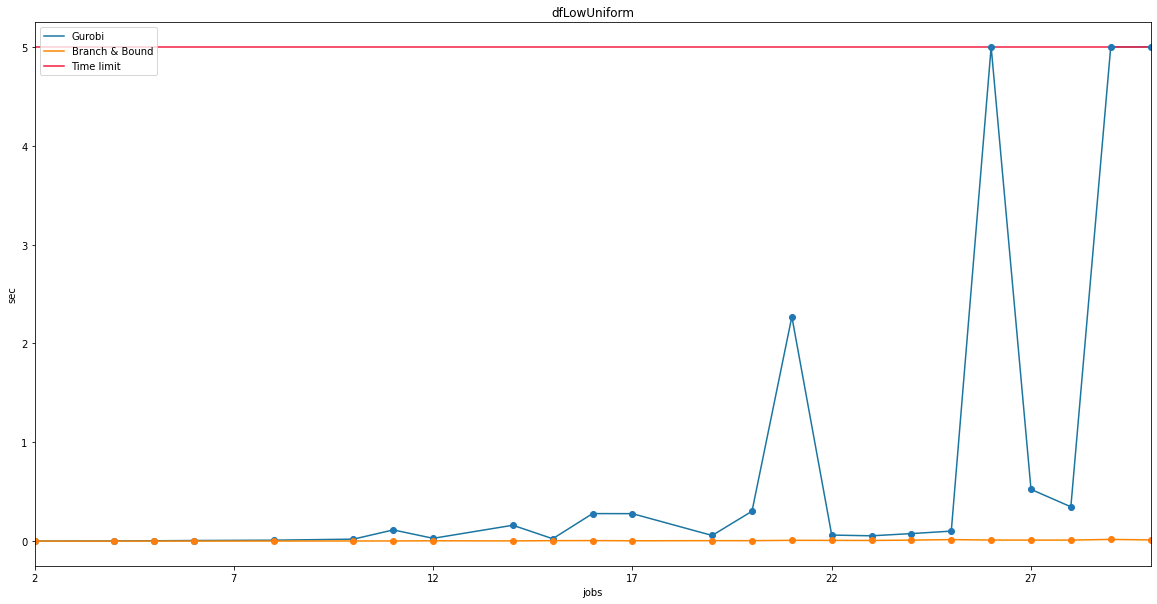

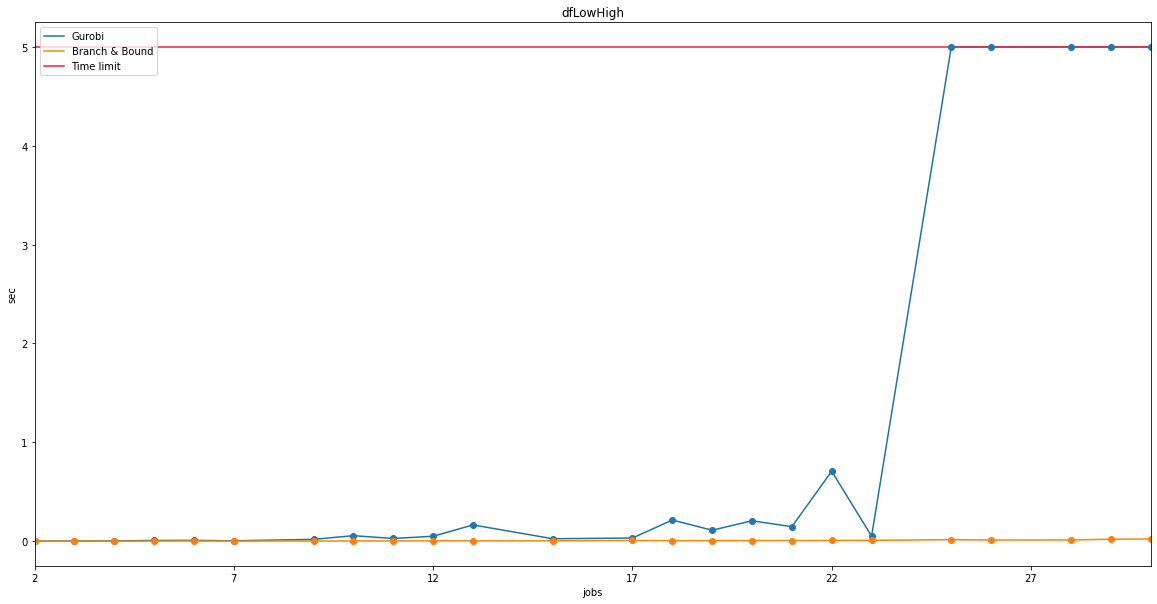

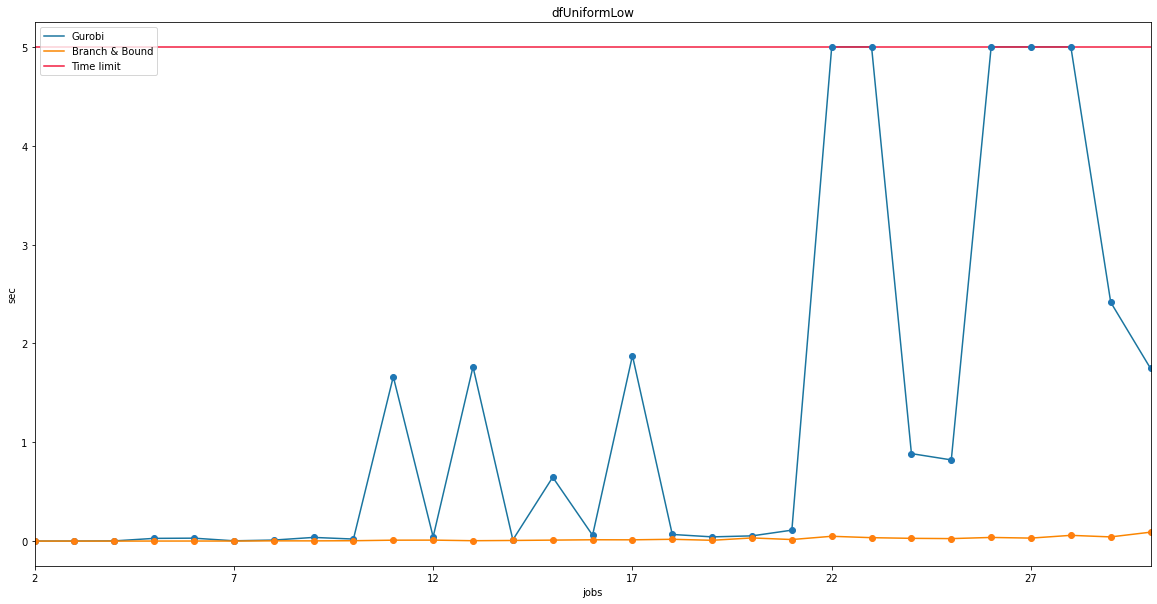

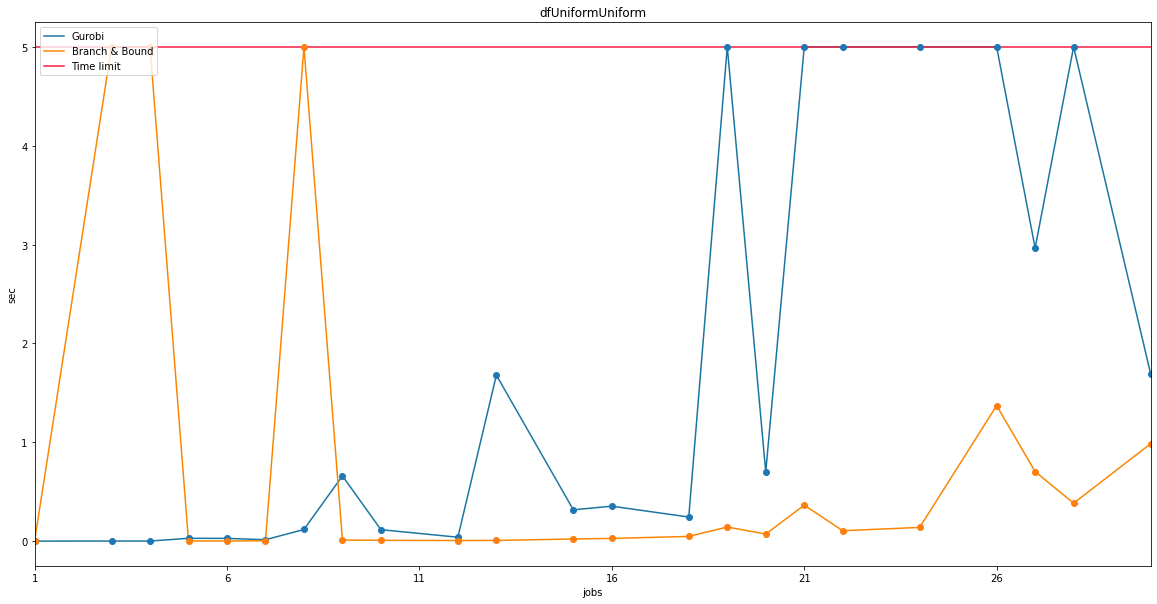

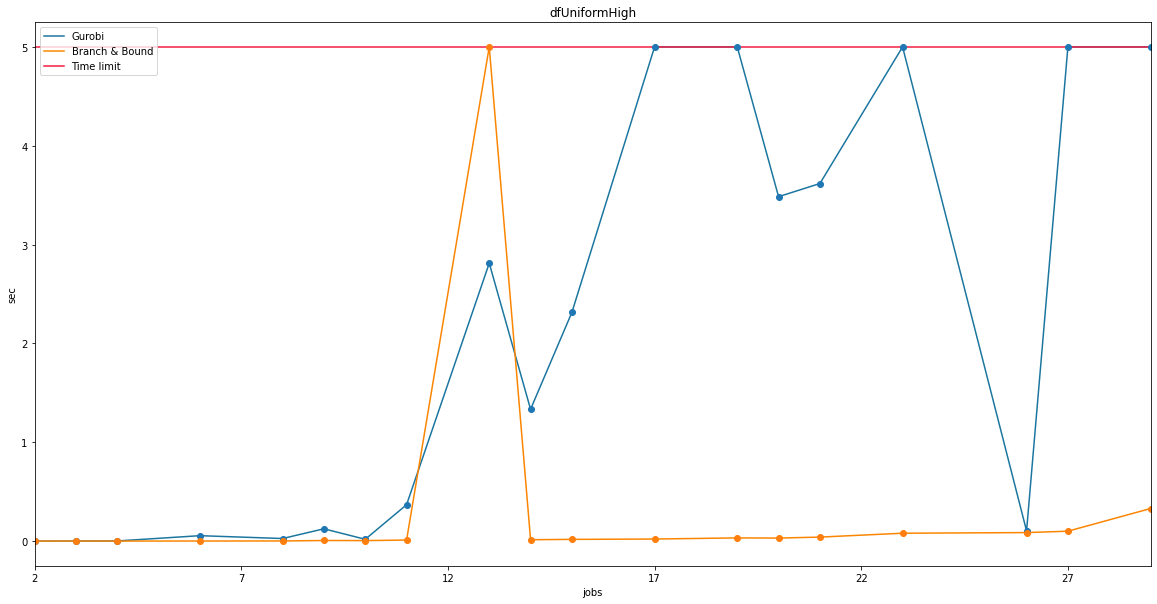

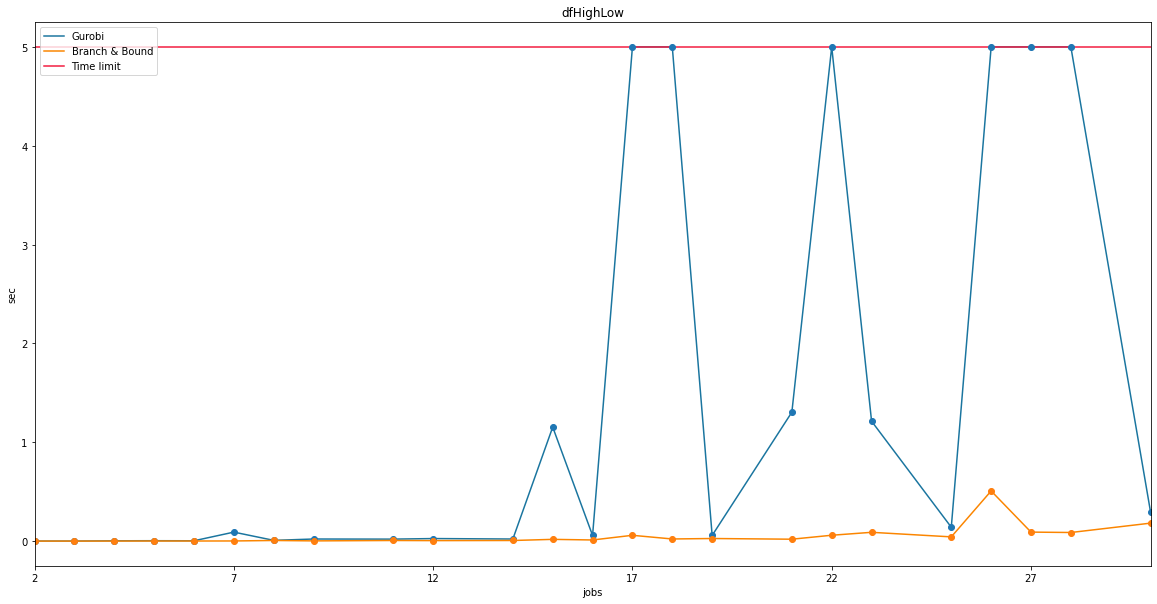

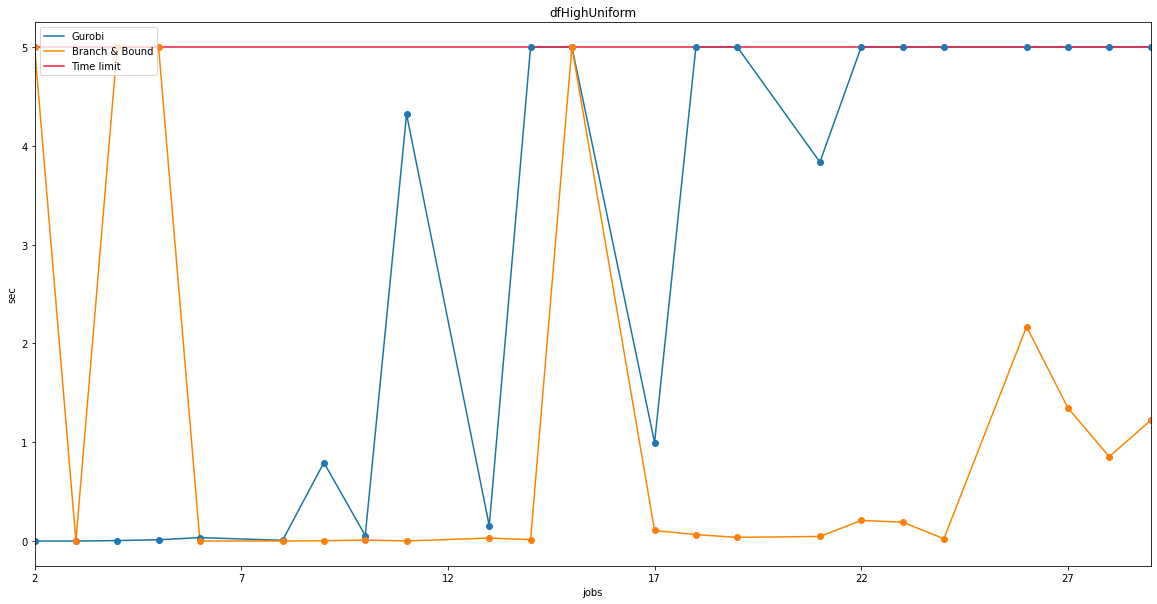

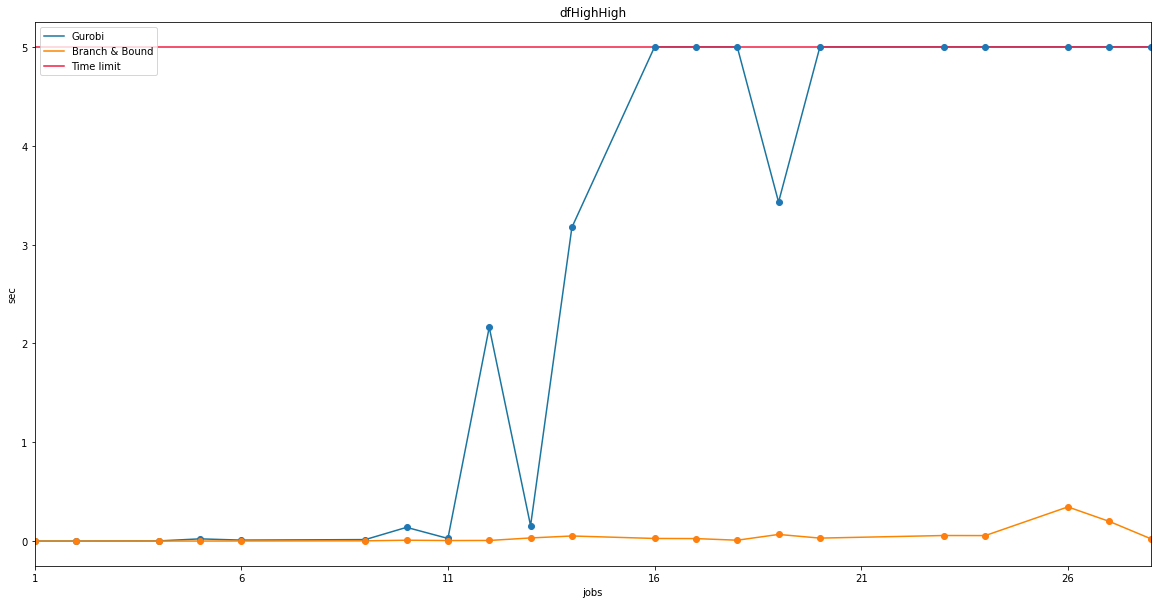

In [43]:
i = 0
for df in dfs:
  graficoTempo(labels[i],df,5)
  i += 1
print(i)